In [2]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 660.6 kB/s eta 0:00:01
     ------------------------- ------------ 41.0/60.4 kB 393.8 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 460.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.6 MB 660.6 kB/s eta 0:00:16
   ---------------------------------------- 0.0/10.6 MB 495.5 kB/s eta 0:00:22
   ---------------------------------------- 0.1/10.6 MB 491.5 kB/s eta 0:00:22
   ---------------------------------------- 0.1/10.6 MB 525.1 kB/s eta 0:00:20
   ---------------------------------------- 0.1/10.6 MB 547.6 kB/s eta 0:00:20
    --------------------------------------- 0.1/10.6 MB 500.5 kB/s eta 0:00:21
    --------------------------------------- 0.2/10.6 MB 482.7 kB/s eta 

In [2]:
pip install pyarrow

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/24.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/24.8 MB 1.1 MB/s eta 0:00:23
   ---------------------------------------- 0.1/24.8 MB 1.1 MB/s eta 0:00:24
   ---------------------------------------- 0.1/24.8 MB 950.9 kB/s eta 0:00:26
   ---------------------------------------- 0.2/24.8 MB 952.6 kB/s eta 0:00:26
   ---------------------------------------- 0.2/24.8 MB 981.9 kB/s eta 0:00:26
   ---------------------------------------- 0.3/24.8 MB 1.0 MB/s eta 0:00:25
   ---------------------------------------- 0.3/24.8 MB 842.9 kB/s eta 0:00:30
    --------------------------------------- 0.3/24.8 MB 873.8 kB/s eta 0:00:29
    --------------------------------------- 0.4/24.8 MB 882.8 kB/s eta 0:00:28
    --------------------------------------- 0.4/24.8 MB 881.6 kB/s eta 0:00:28
    --------------------------------------- 0.5/24.8 MB 901.1 kB/s eta 0:

In [1]:
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import sklearn
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
import random
import shutil
import math

#from tensorflow.keras.applications import preprocess_input

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from tensorflow.keras.applications import EfficientNetB2, EfficientNetB3, VGG19
from sklearn.model_selection import KFold

In [3]:
#ROOT_DIR='/kaggle/input/eurosat-dataset/EuroSAT'
#os.listdir(ROOT_DIR)

In [4]:
def load_images_from_directory(ROOT_DIR, normalize_rgb=False):
    images=[]
    labels=[]
    image_names=[]
    i=0
    for dir_name in os.listdir(ROOT_DIR):
        if os.path.isdir(os.path.join(ROOT_DIR,dir_name)):
            class_name = dir_name.split("\\")[-1]
            print(class_name)
            sub_dir_name = os.path.join(ROOT_DIR,dir_name)
            print(sub_dir_name)

            if os.path.isdir(sub_dir_name):    
                for img in os.listdir(sub_dir_name):
                    if img.endswith(('.jpg', '.jpeg', '.png')):                    
                        image_read = cv2.imread(os.path.join(ROOT_DIR,dir_name,img))
                        #print("{} image shape is : {}".format(img, image_read.shape))
                        img_cvt_color = cv2.cvtColor(image_read, cv2.COLOR_BGR2RGB)
                        
                        image_names.append(img)
                        images.append(img_cvt_color)
                        labels.append(class_name)
#        i+=1
#        if i==1:
#            break
    if normalize_rgb:
        return np.array(images)/255, np.column_stack((np.array(labels), np.array(image_names)))    
    else: 
        return np.array(images), np.column_stack((np.array(labels), np.array(image_names)))

In [3]:
def split_organize_data(root_dir, train_dir, test_dir, split_ratio=0.8):
    print("train dir : ", train_dir)
    print("test dir : ", test_dir)
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)
    
    for class_folder in os.listdir(root_dir):
        class_source_dir=os.path.join(root_dir, class_folder)
        if not os.path.isdir(class_source_dir):
            continue
        
        train_class_dir = os.path.join(train_dir, class_folder)
        test_class_dir = os.path.join(test_dir, class_folder)
        
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)
        
        files = os.listdir(class_source_dir)
        
        random.shuffle(files)
        
        num_train = int(len(files)*split_ratio)
        num_test = len(files) - num_train
        
        train_files = files[:num_train]
        test_files = files[num_train:]
        
        print(train_class_dir)
        for file in train_files:
            shutil.copy(os.path.join(class_source_dir, file), os.path.join(train_class_dir, file))
        print(test_class_dir)
        for file in test_files:
            shutil.copy(os.path.join(class_source_dir, file), os.path.join(test_class_dir, file))
        

In [5]:
root_dir='C:\\Users\\Abhi\\Jupyter_notebooks\\Cloudxlab DS PGP\\MachineLearning\\CapstoneProject_Satellite_Image_Classification\\EuroSAT_RGB\\EuroSAT_RGB'
train_dir='C:\\Users\\Abhi\\Jupyter_notebooks\\Cloudxlab DS PGP\\MachineLearning\\CapstoneProject_Satellite_Image_Classification\\EuroSAT_RGB\\train'
test_dir='C:\\Users\\Abhi\\Jupyter_notebooks\\Cloudxlab DS PGP\\MachineLearning\\CapstoneProject_Satellite_Image_Classification\\EuroSAT_RGB\\test'
#root_dir="/kaggle/input/eurosat-dataset/EuroSAT"
#train_dir="/kaggle/working/eurosat-dataset/train"
#test_dir="/kaggle/working/eurosat-dataset/test"

In [38]:
split_organize_data(root_dir, train_dir, test_dir, 0.8)

train dir :  C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\train
test dir :  C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\test
C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\train\AnnualCrop
C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\test\AnnualCrop
C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\train\Forest
C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\test\Forest
C:\Users\Abhi\Jupyter_notebooks\Cloudxlab DS PGP\MachineLearning\CapstoneProject_Satellite_Image_Classification\EuroSAT_RGB\train\HerbaceousVegetation
C:\Users\Ab

In [8]:
# #Using Functional API, building RESNET-34

# #Need to make atleast 2 mehtods , one for final architecture, and one for residual unit
# def residual_block(inputs, filters , strides):
    
#     shortcut=inputs
#     print(shortcut.shape)
#     if strides!=1 or shortcut.shape[-1] != filters[-1]:
#         shortcut = tf.keras.layers.Conv2D(filters[0], 1, strides=strides, padding='same')(shortcut)
#         shortcut = tf.keras.layers.BatchNormalization()(shortcut)
    
#     #First block 
#     x=tf.keras.layers.Conv2D(filters=filters[0],kernel_size=3,strides=strides, padding="same")(inputs)
#     x=tf.keras.layers.BatchNormalization()(x)
#     x=tf.keras.layers.Activation("relu")(x)
    
#     #Second Block
#     x=tf.keras.layers.Conv2D(filters=filters[0],kernel_size=3,strides=(1,1), padding="same")(x)
#     x=tf.keras.layers.BatchNormalization()(x)
    
#     #Third Block Skip Layer
#     x=tf.keras.layers.Add()([shortcut, x])
#     x=tf.keras.layers.Activation("relu")(x)
    
#     return x
    
# def stage(x, filters, block, strides):
#     for i in range(block):
#         if i == 0 :
#             x=residual_block(x, filters, strides)
#         else:
#             x=residual_block(x, filters, strides=1)
#     return x

# def build_resnet_34(input_shape=(64,64,3), num_classes=10 ):
#     inputs = tf.keras.layers.Input(shape=input_shape)
    
#     #Starting convolutional layers of kernel 7*7 and stride 2
#     x=tf.keras.layers.Conv2D(64, kernel_size=7, padding="same", strides=2, activation="relu")(inputs)
#     x=tf.keras.layers.MaxPooling2D(pool_size=(3,3), strides=2, padding="same")(x)
    
#     #Residual Blocks
#     x=stage(x,filters=[64],block=3, strides=1 )
#     x=stage(x,filters=[128],block=4, strides=2 )
#     x=stage(x,filters=[256],block=6, strides=2 )
#     x=stage(x,filters=[512],block=3, strides=1 )
    
#     #Final Output Layers
#     x=tf.keras.layers.GlobalAveragePooling2D()(x)
#     x=tf.keras.layers.Dense(512, activation="relu", kernel_initializer="he_normal")(x)
#     outputs= tf.keras.layers.Dense(num_classes, activation="softmax")(x)
#     model = tf.keras.Model(inputs, outputs)
#     return model


In [9]:
# model = build_resnet_34(input_shape=(64,64,3), num_classes=10) 

(None, 16, 16, 64)
(None, 16, 16, 64)
(None, 16, 16, 64)
(None, 16, 16, 64)
(None, 8, 8, 128)
(None, 8, 8, 128)
(None, 8, 8, 128)
(None, 8, 8, 128)
(None, 4, 4, 256)
(None, 4, 4, 256)
(None, 4, 4, 256)
(None, 4, 4, 256)
(None, 4, 4, 256)
(None, 4, 4, 256)
(None, 4, 4, 512)
(None, 4, 4, 512)


In [5]:
#Making Resnet34 using class ResidualUnit to check the performance 
class ResidualUnit(keras.layers.Layer):
    def __init__(self, filters, strides=1, activation='relu', **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
        self.filters=filters
        self.strides=strides
        self.main_layers = [
            keras.layers.Conv2D(filters, 3, strides=strides,
                               padding="same", use_bias=False),
            keras.layers.BatchNormalization(),
            self.activation,
            keras.layers.Conv2D(filters, 3, strides=1,
                               padding="same", use_bias=False),
            keras.layers.BatchNormalization()
        ]
        self.skip_layers=[]
        if strides > 1 :
            self.skip_layers = [
                keras.layers.Conv2D(filters, 1, strides=strides,
                                   padding="same", use_bias=False),
                keras.layers.BatchNormalization()
            ]
        
    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z=layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z+skip_Z)
    
    def get_config(self):
        config = super().get_config()
        config.update({
            'filters': self.filters,
            'strides': self.strides,
            'activation': keras.activations.serialize(self.activation)
        })
        return config

In [6]:
# ##Resnet Model using Sequential API Keras

# model = keras.models.Sequential()
# model.add(keras.layers.Conv2D(64, 7, strides=2, 
#                               input_shape=[64,64,3],
#                              padding="same", use_bias=False))
# model.add(keras.layers.BatchNormalization())
# model.add(keras.layers.Activation("relu"))
# model.add(keras.layers.MaxPool2D(pool_size=3, strides=2, padding="Same"))
# prev_filters=64
# for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
#     strides=1 if filters==prev_filters else 2
#     model.add(ResidualUnit(filters, strides=strides))
#     prev_filters = filters
# model.add(keras.layers.GlobalAvgPool2D())
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(10, activation="softmax"))

In [13]:

def create_vgg19_model(input_shape):
    base_model = VGG19(weights='imagenet', include_top=False)

    base_model.trainable = False

    inputs = keras.Input(shape=input_shape)

    x = base_model(inputs, training=False)

    # Add custom classification head
    #x = base_model.output
    #x = tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu', padding="same", data_format="channels_last")(x)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tf.keras.layers.Dense(512, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x) 
    x = tf.keras.layers.Dense(1024, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.5)(x) 
    outputs = tf.keras.layers.Dense(10, activation='softmax')(x)
    model = keras.Model(inputs, outputs)
    return model


In [14]:
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam
from datetime import datetime
# Create a TensorBoard callback to log gradients
log_dir = "C:\\Users\\Abhi\\Jupyter_notebooks\\Cloudxlab DS PGP\\logs\\gradient\\" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
#checkpoint_cb = keras.callbacks.ModelCheckpoint("EfficientNet_b2_75x75_transfer_learning.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=6, restore_best_weights=True)

In [15]:
model=create_vgg19_model((64,64,3))

80150528/80134624 [==============================] - 14s 0us/step


In [16]:
model.compile(optimizer=Nadam(learning_rate=0.00005), loss='sparse_categorical_crossentropy' , metrics=['accuracy'] )

In [17]:
model.summary(show_trainable=True)

Model: "model_1"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_4 (InputLayer)        [(None, 64, 64, 3)]       0         Y          
                                                                            
 vgg19 (Functional)          (None, None, None, 512)   20024384  N          
                                                                            
 global_average_pooling2d_1   (None, 512)              0         Y          
 (GlobalAveragePooling2D)                                                   
                                                                            
 dense_3 (Dense)             (None, 512)               262656    Y          
                                                                            
 dropout_2 (Dropout)         (None, 512)               0         Y          
                                                           

In [18]:
#### Setup Image Data Generator with augmentation

augment_data_generator=ImageDataGenerator(rotation_range=180, 
                                          width_shift_range=0.2, 
                                          height_shift_range=0.2, 
                                          rescale=1./255, 
                                          shear_range=0.3, 
                                          zoom_range=0.3, 
                                          horizontal_flip=True, 
                                          vertical_flip=True,
                                          validation_split=0.2,
                                          brightness_range=(0.7,1.3),
                                         data_format="channels_last")

#data_dir = '/kaggle/working/eurosat-dataset/train'

results=[]

n_splits = 2
kf = KFold(n_splits=n_splits)

for train_index, val_index in kf.split(train_dir):

    train_data_generator = augment_data_generator.flow_from_directory(
        train_dir, 
        target_size=(75,75),
        color_mode='rgb',
        batch_size=24,
        class_mode='sparse',
        subset='training',
        shuffle=True,
        seed=52
    )

    validation_data_generator = augment_data_generator.flow_from_directory(
        train_dir, 
        target_size=(75,75),
        color_mode='rgb',
        batch_size=24,
        class_mode='sparse',
        subset='validation',
        shuffle=False,
        seed=52
    )
    history=model.fit(train_data_generator, 
                  epochs=50, 
                  validation_data=validation_data_generator,
                 callbacks=[early_stopping_cb, tensorboard_callback])
    loss, accuracy = model.evaluate(validation_data_generator)
    results.append((loss, accuracy))

Found 17280 images belonging to 10 classes.
Found 4320 images belonging to 10 classes.
Epoch 1/50
720/720 [==============================] - 52s 69ms/step - loss: 1.8593 - accuracy: 0.3493 - val_loss: 1.2989 - val_accuracy: 0.5762
Epoch 2/50
720/720 [==============================] - 50s 69ms/step - loss: 1.3042 - accuracy: 0.5462 - val_loss: 1.0449 - val_accuracy: 0.6491
Epoch 3/50
720/720 [==============================] - 51s 70ms/step - loss: 1.1331 - accuracy: 0.6025 - val_loss: 0.9832 - val_accuracy: 0.6650
Epoch 4/50
720/720 [==============================] - 52s 71ms/step - loss: 1.0611 - accuracy: 0.6350 - val_loss: 0.9058 - val_accuracy: 0.6859
Epoch 5/50
720/720 [==============================] - 52s 71ms/step - loss: 0.9947 - accuracy: 0.6572 - val_loss: 0.8697 - val_accuracy: 0.7019
Epoch 6/50
720/720 [==============================] - 50s 69ms/step - loss: 0.9593 - accuracy: 0.6650 - val_loss: 0.8610 - val_accuracy: 0.6988
Epoch 7/50
720/720 [=============================

Epoch 6/50
720/720 [==============================] - 48s 66ms/step - loss: 0.6747 - accuracy: 0.7632 - val_loss: 0.6402 - val_accuracy: 0.7750
Epoch 7/50
720/720 [==============================] - 48s 66ms/step - loss: 0.6724 - accuracy: 0.7664 - val_loss: 0.6194 - val_accuracy: 0.7843
Epoch 8/50
720/720 [==============================] - 48s 66ms/step - loss: 0.6666 - accuracy: 0.7676 - val_loss: 0.6359 - val_accuracy: 0.7796
Epoch 9/50
720/720 [==============================] - 48s 66ms/step - loss: 0.6894 - accuracy: 0.7600 - val_loss: 0.6463 - val_accuracy: 0.7752
Epoch 10/50
180/180 [==============================] - 9s 49ms/step - loss: 0.6256 - accuracy: 0.7801


In [19]:
# Aggregate results
avg_loss = np.mean([result[0] for result in results])
avg_accuracy = np.mean([result[1] for result in results])
print(f'Average loss: {avg_loss}, Average accuracy: {avg_accuracy}')

Average loss: 0.6248323023319244, Average accuracy: 0.7783564925193787


In [62]:
#del os.environ['TENSORBOARD_BINARY']

In [20]:
%load_ext tensorboard

In [21]:
for i, layer in enumerate(model.layers):
    print(i, layer.name)

0 input_4
1 vgg19
2 global_average_pooling2d_1
3 dense_3
4 dropout_2
5 dense_4
6 dropout_3
7 dense_5


In [22]:
for layer in model.layers[:]:
    layer.trainable = True



In [23]:
#base_model.trainable = True
model.summary(show_trainable=True)

Model: "model_1"
____________________________________________________________________________
 Layer (type)                Output Shape              Param #   Trainable  
 input_4 (InputLayer)        [(None, 64, 64, 3)]       0         Y          
                                                                            
 vgg19 (Functional)          (None, None, None, 512)   20024384  Y          
                                                                            
 global_average_pooling2d_1   (None, 512)              0         Y          
 (GlobalAveragePooling2D)                                                   
                                                                            
 dense_3 (Dense)             (None, 512)               262656    Y          
                                                                            
 dropout_2 (Dropout)         (None, 512)               0         Y          
                                                           

In [24]:
model.compile(optimizer=Nadam(learning_rate=0.000001,clipnorm=1.0), loss='sparse_categorical_crossentropy' , metrics=['accuracy'] )

In [25]:
checkpoint_cb1 = keras.callbacks.ModelCheckpoint("vgg19_transfer_learning.h5", save_best_only=True)
early_stopping_cb1 = keras.callbacks.EarlyStopping(patience=8, restore_best_weights=True)

history=model.fit(train_data_generator, 
                  epochs=70, 
                  validation_data=validation_data_generator,
                 callbacks=[checkpoint_cb1, early_stopping_cb1, tensorboard_callback])

Epoch 1/70
720/720 [==============================] - 168s 220ms/step - loss: 0.5930 - accuracy: 0.7925 - val_loss: 0.5074 - val_accuracy: 0.8264
Epoch 2/70
720/720 [==============================] - 158s 219ms/step - loss: 0.4919 - accuracy: 0.8333 - val_loss: 0.4119 - val_accuracy: 0.8569
Epoch 3/70
720/720 [==============================] - 158s 219ms/step - loss: 0.4391 - accuracy: 0.8491 - val_loss: 0.3722 - val_accuracy: 0.8738
Epoch 4/70
720/720 [==============================] - 156s 217ms/step - loss: 0.3999 - accuracy: 0.8630 - val_loss: 0.3816 - val_accuracy: 0.8727
Epoch 5/70
720/720 [==============================] - 156s 217ms/step - loss: 0.3770 - accuracy: 0.8747 - val_loss: 0.3429 - val_accuracy: 0.8829
Epoch 6/70
720/720 [==============================] - 155s 215ms/step - loss: 0.3523 - accuracy: 0.8834 - val_loss: 0.3169 - val_accuracy: 0.8954
Epoch 7/70
720/720 [==============================] - 154s 214ms/step - loss: 0.3349 - accuracy: 0.8896 - val_loss: 0.3227 -

Epoch 57/70
720/720 [==============================] - 127s 176ms/step - loss: 0.1323 - accuracy: 0.9595 - val_loss: 0.1626 - val_accuracy: 0.9507
Epoch 58/70
720/720 [==============================] - 127s 176ms/step - loss: 0.1273 - accuracy: 0.9594 - val_loss: 0.1648 - val_accuracy: 0.9539
Epoch 59/70
720/720 [==============================] - 126s 175ms/step - loss: 0.1281 - accuracy: 0.9604 - val_loss: 0.1588 - val_accuracy: 0.9530
Epoch 60/70
720/720 [==============================] - 126s 175ms/step - loss: 0.1325 - accuracy: 0.9617 - val_loss: 0.1579 - val_accuracy: 0.9544
Epoch 61/70
720/720 [==============================] - 127s 176ms/step - loss: 0.1305 - accuracy: 0.9580 - val_loss: 0.1449 - val_accuracy: 0.9567


In [26]:
def create_graph_for_nn_training(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
    plt.show()

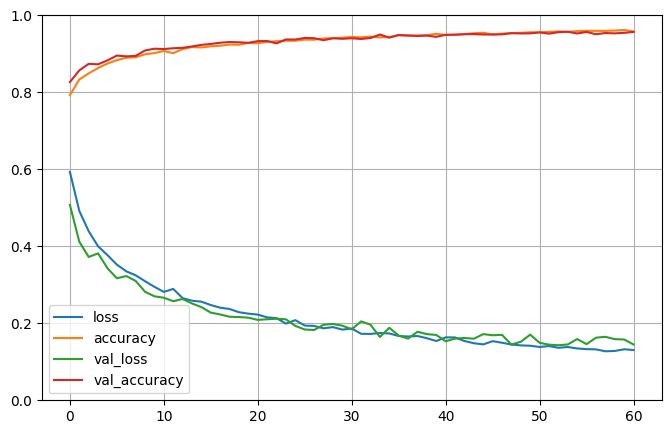

In [27]:
create_graph_for_nn_training(history)

In [28]:
model.evaluate(validation_data_generator)

180/180 [==============================] - 9s 48ms/step - loss: 0.1556 - accuracy: 0.9542


[0.15559667348861694, 0.9541666507720947]

In [29]:
#test_dir='/kaggle/working/eurosat-dataset/test'

test_data_gen = ImageDataGenerator(rescale=1.0/255,
                                   data_format="channels_last")
test_data_generator = test_data_gen.flow_from_directory(
    test_dir, 
    target_size=(64,64),
    color_mode='rgb',
    batch_size=32,
    class_mode='sparse',
    interpolation="lanczos",
    shuffle=False
)

Found 5400 images belonging to 10 classes.


In [30]:
batch_size=32
test_data_generator.reset() 
y_pred = model.predict(test_data_generator)#,steps= math.ceil(test_data_generator.samples//batch_size),workers=8)

y_pred.shape

(5400, 10)

In [31]:
predicted_labels = np.argmax(y_pred, axis=1)

# Compare with ground truth labels
true_labels = test_data_generator.classes

# Calculate accuracy
accuracy = np.mean(predicted_labels == true_labels)
print("Accuracy:", accuracy)

Accuracy: 0.8381481481481482


In [32]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
#from sklearn.metrics import plot_confusion_matrix

def precision_recall_f1_value(actual_value, predicted_value, classes, average_type='binary'):
    precision_value = precision_score(actual_value, predicted_value, average=average_type)
    recall_value = recall_score(actual_value, predicted_value, average=average_type)
    f1 = f1_score(actual_value, predicted_value, average=average_type)
    conf_matrix = confusion_matrix(actual_value, predicted_value)
    print("Precision Value : " + str(precision_value))
    print("Recall value : " + str(recall_value))
    print("F1 Score : " + str(f1))
    print("Following is the confusion matrx for this model : ")
    print(conf_matrix)
    plt.matshow(conf_matrix, cmap=plt.cm.gray)
    
    plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.viridis)
    plt.title('Confusion Matrix')
    plt.colorbar()
    classes=classes
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes, rotation=0)
    
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

Precision Value : 0.8529750088724999
Recall value : 0.8323499999999999
F1 Score : 0.8347332297291243
Following is the confusion matrx for this model : 
[[421   0   0  22   1   4 118   0  33   1]
 [  6 487   9   3   0   1   2  35  41  16]
 [  8   2 562   3   1   0   2   8   1  13]
 [  2   0  17 420  13   1  17  19  11   0]
 [  0   0   1   1 432   0   0  66   0   0]
 [  5   9  21  19   1 275  37   3  27   3]
 [  1   0 110   1  21   0 350  17   0   0]
 [  0   0   4   0   0   0   0 596   0   0]
 [  6   0   8  25   5   1   2   2 451   0]
 [  0   0   1   1   0   3   0   0  63 532]]


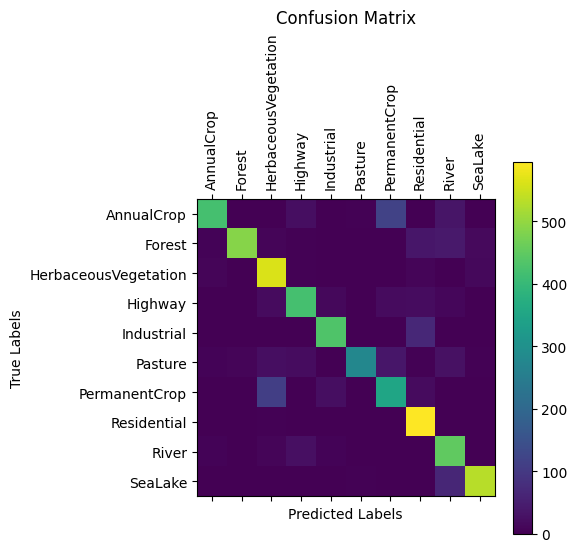

In [33]:
precision_recall_f1_value(true_labels, predicted_labels, ["AnnualCrop", "Forest", "HerbaceousVegetation", "Highway", "Industrial", "Pasture", "PermanentCrop", "Residential", "River", "SeaLake"],"macro")

In [34]:
%tensorboard --log-dir 'C:\\Users\\Abhi\\Jupyter_notebooks\\"Cloudxlab DS PGP"\\logs\\gradient' --port 6060

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.